---

title: "多元正态分布"
date: 2024-11-24
author: 郝鸿涛
slug: multivariate-normal
draft: false
toc: false
tags: 统计

---

一个正态分布很好理解:

$$z_1 \sim \mathcal{N}(0, 1)$$

两个独立的正态分布也好理解

$$z_1 \sim \mathcal{N}(0, 1), z_2 \sim \mathcal{N}(0, 1)$$

那如果我们想有两个变量 $x$ 与 $y$，它们不仅各自符合正态分布 ($\mu = 0, \sigma = 1$)，而且两者相关系数为 $\rho$，那我们可以这样：

$$x = z_1$$ 
$$y = \rho \cdot z_1 + \sqrt{1 - \rho^2}\cdot z_2$$

In [23]:
import numpy as np 
n = 10**4
z1 = np.random.randn(n)
z2 = np.random.randn(n)

rho = 0.8
x = z1 
y = rho*z1 + np.sqrt(1 - rho**2) * z2 
print("生成数据的相关系数:", np.corrcoef(x, y)[0, 1])

生成数据的相关系数: 0.8032636045203917


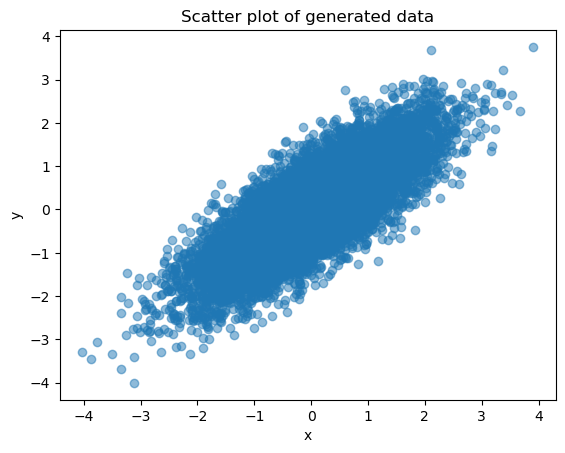

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of generated data')
plt.show()


我们可以把密度用 Z 轴来表示：

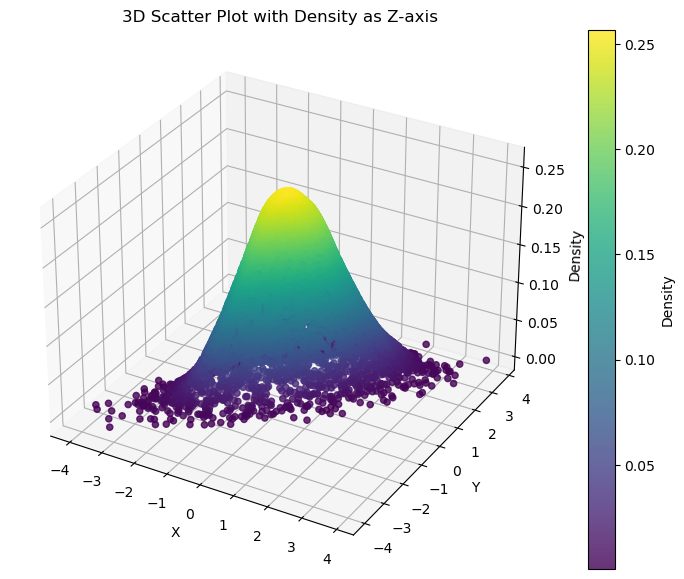

In [25]:
#| code-fold:true

from scipy.stats import gaussian_kde 

values = np.vstack([x, y])
kde = gaussian_kde(values)
density = kde(values)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, density, c=density, cmap="viridis", alpha=0.8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Density")
plt.title("3D Scatter Plot with Density as Z-axis")
plt.colorbar(sc, label="Density")
plt.show()

既然 X 与 Y 并不独立（相关系数为 0.8），那多元正态分布就可以用来描述联合密度概率，比如 $P(X = 1 \& Y = 1)$

In [26]:
kde([[1], [1]])

array([0.14583542])

上面我们用的是模拟的方法，用了 1 万个随机数据。但更加普遍，也更加正确的做法是直接用多元正态分布的概率密度函数 (PDF):

$$f(X) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (X - \mu)^\top \Sigma^{-1} (X - \mu) \right)$$

其中 $\mu$ 为均值向量:

$$\mu = [\mu_1, \mu_2, \dots, \mu_d]$$

$\Sigma$ 为协方差矩阵：

$$\Sigma =
   \begin{bmatrix}
   \text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_d) \\
   \text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_d) \\
   \vdots & \vdots & \ddots & \vdots \\
   \text{Cov}(X_d, X_1) & \text{Cov}(X_d, X_2) & \cdots & \text{Var}(X_d)
   \end{bmatrix}
$$

- 对角线元素为每个变量的方差：$\text{Var}(X_i)$。
- 非对角线元素为变量间的协方差：$\text{Cov}(X_i, X_j)$

$X$ 为 $d$ 维随机向量：

$$X = [X_1, X_2, ..., X_d]$$

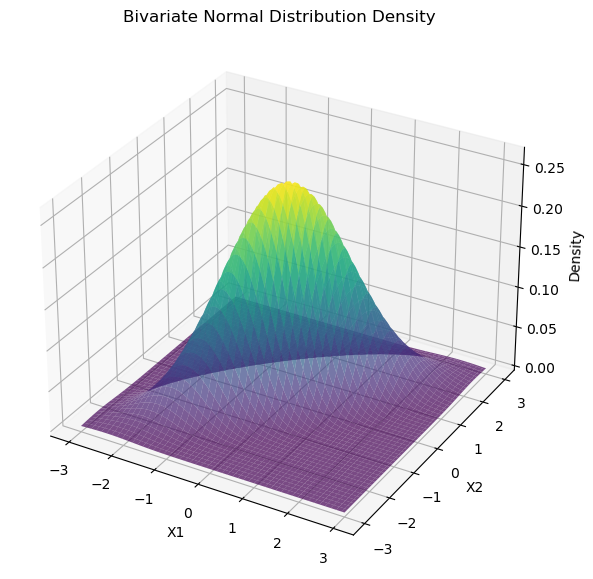

In [32]:
from scipy.stats import multivariate_normal

# Define mean and covariance for a bivariate normal distribution
mean = [0, 0]  # Centered at origin
covariance = [[1, 0.8], [0.8, 1]]  # Covariance matrix with some correlation

# Create a grid of points in the x and y range
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the bivariate normal density at each grid point
rv = multivariate_normal(mean, covariance)
Z = rv.pdf(pos)

# Plotting the density function

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Density')
ax.set_title('Bivariate Normal Distribution Density')
plt.show()